torch.Size([41, 2])
torch.Size([41, 2])
torch.Size([512, 361])
tensor(1.)
torch.Size([512, 361])


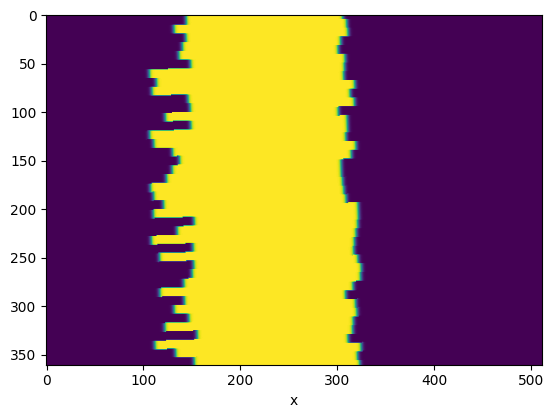

In [37]:
import matplotlib.pyplot as plt
import torch
import sys
sys.path.append('../')
from src.create_mlc_mask import create_mlc_mask

# Example usage
grid_size = (512, 361)  # Example grid size
mlc_widths = torch.tensor([(x, x+grid_size[1]/40) for x in torch.linspace(0, grid_size[1], 41)])  # Example positions

mlc_positions = torch.tensor([(torch.randint(100, 150, (1, )), torch.randint(300, 320, (1,))) for x in range(41)])  # Example positions
gantry_angle = torch.tensor([2])  # Example angle in degrees

print(mlc_widths.shape)
print(mlc_positions.shape)
isocenter = torch.tensor([150, 60])
mask = create_mlc_mask(mlc_widths, mlc_positions, gantry_angle, grid_size, isocenter)
plt.imshow(mask.T)
print(torch.max(mask))
plt.xlabel("x")
print(mask.shape)

In [ ]:
v

In [ ]:
sys.path

In [ ]:
rotated.shape

In [ ]:
[(x, x+grid_size[0]/40) for x in torch.linspace(0, grid_size[0], 41)]

In [ ]:
torch.zeros(300, 150).shape

In [7]:
import torchio as tio
from einops import rearrange
list = []
list.append(tio.Subject(
    t1=tio.ScalarImage('../series-000001')
))
dataset = tio.SubjectsDataset(list)
patient = next(iter(dataset))

torch.Size([1, 512, 512, 361])


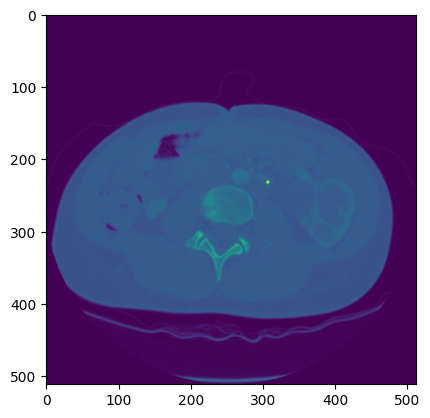

In [12]:
print(patient['t1'][tio.DATA].shape)
plt.imshow(patient['t1'][tio.DATA][0, :, :, 100].T)

patient['t1'][tio.DATA] = rearrange(patient['t1'][tio.DATA], 'c h w d->c d w h')

In [13]:
patient['t1'][tio.DATA]

tensor([[[[-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          ...,
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000]],

         [[-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          ...,
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000]],

         [[-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          [-1000, -1000, -1000,  ..., -1000, -1000, -1000],
          ...,
          [-1000, -1000, -1000,  ..., -1000, -1000,

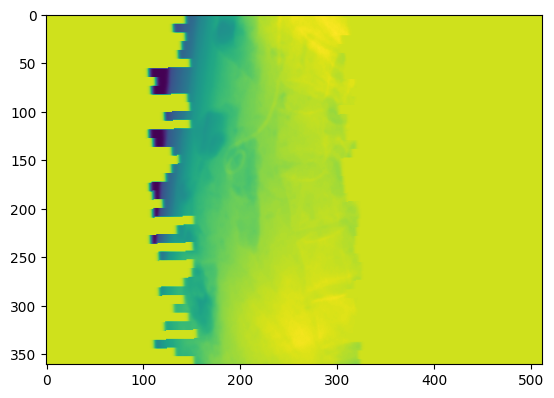

In [43]:
plt.imshow(patient['t1'][tio.DATA][0, :, :, :].sum(dim = 2)*mask.T)

In [39]:
patient['t1'][tio.DATA][0, :, :, :].sum(dim = 2).shape

torch.Size([361, 512])

In [40]:
mask.shape

torch.Size([512, 361])